In [38]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

# To use in feature selection
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

# To be used for data scaling and encoding
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, QuantileTransformer, MinMaxScaler


# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# date time
import time
from datetime import datetime

In [39]:
df = pd.read_csv('abalone.csv')

In [40]:
df.head(8)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15
1,M,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7
2,F,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9
3,M,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10
4,I,0.330,0.255,0.080,0.205,0.089,0.040,0.055,7
5,I,0.425,0.300,0.095,0.351,0.141,0.077,0.120,8
6,F,0.530,0.415,0.150,0.777,0.237,0.141,0.330,20
7,F,0.545,0.425,0.125,0.768,0.294,0.149,0.260,16


# Dummy Variables

In [41]:
# Select columns with dtype 'object'
obj_cols = df.select_dtypes(include=['object']).columns.to_list()

# Print the selected columns
print(obj_cols)

['Sex']


In [42]:
# dummy_variable = pd.get_dummies(df[obj_columns_names], drop_first=True)
# df = pd.concat([df, dummy_variable], axis=1)
# df.drop(obj_columns_names, axis=1, inplace=True)

## DATA PRE-PROCESSING AND EDA

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Describe

In [44]:
# df.describe(include="object").T

In [45]:
df.describe(include="float64").T

,count,mean,std,min,25%,50%,75%,max
Length,4177.000,0.524,0.120,0.075,0.450,0.545,0.615,0.815
Diameter,4177.000,0.408,0.099,0.055,0.350,0.425,0.480,0.650
Height,4177.000,0.140,0.042,0.000,0.115,0.140,0.165,1.130
Whole weight,4177.000,0.829,0.490,0.002,0.442,0.799,1.153,2.825
Shucked weight,4177.000,0.359,0.222,0.001,0.186,0.336,0.502,1.488
Viscera weight,4177.000,0.181,0.110,0.001,0.093,0.171,0.253,0.760
Shell weight,4177.000,0.239,0.139,0.002,0.130,0.234,0.329,1.005


In [46]:
def category_unique_value():
    for col in df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list():
        print("Unique values and corresponding data counts for feature: " + col)
        print("Nunique value:", df[col].nunique())
        print("-" * 90)
#         df_temp = pd.concat(
#             [
#                 df[col].value_counts(),                          
#                 df[col].value_counts(normalize=True) * 100,
#             ],
#             axis=1,
#         )
#         df_temp.columns = ["Count", "Percentage"]
#         print(df_temp)
#         print("-" * 90, '\n'*2)

category_unique_value()

Unique values and corresponding data counts for feature: Length
Nunique value: 134
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Diameter
Nunique value: 111
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Height
Nunique value: 51
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Whole weight
Nunique value: 2429
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Shucked weight
Nunique value: 1515
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Viscera weight
Nunique value: 880
----------------------

In [47]:
def category_unique_value():
    for col in df.select_dtypes(include='object').columns.unique().to_list():
        print("Unique values and corresponding data counts for feature: " + col)
        print("Nunique value:", df[col].nunique())
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[col].value_counts(),                          
                df[col].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90, '\n'*2)

category_unique_value()

Unique values and corresponding data counts for feature: Sex
Nunique value: 3
------------------------------------------------------------------------------------------
   Count  Percentage
M   1528      36.581
I   1342      32.128
F   1307      31.290
------------------------------------------------------------------------------------------ 




<AxesSubplot:>

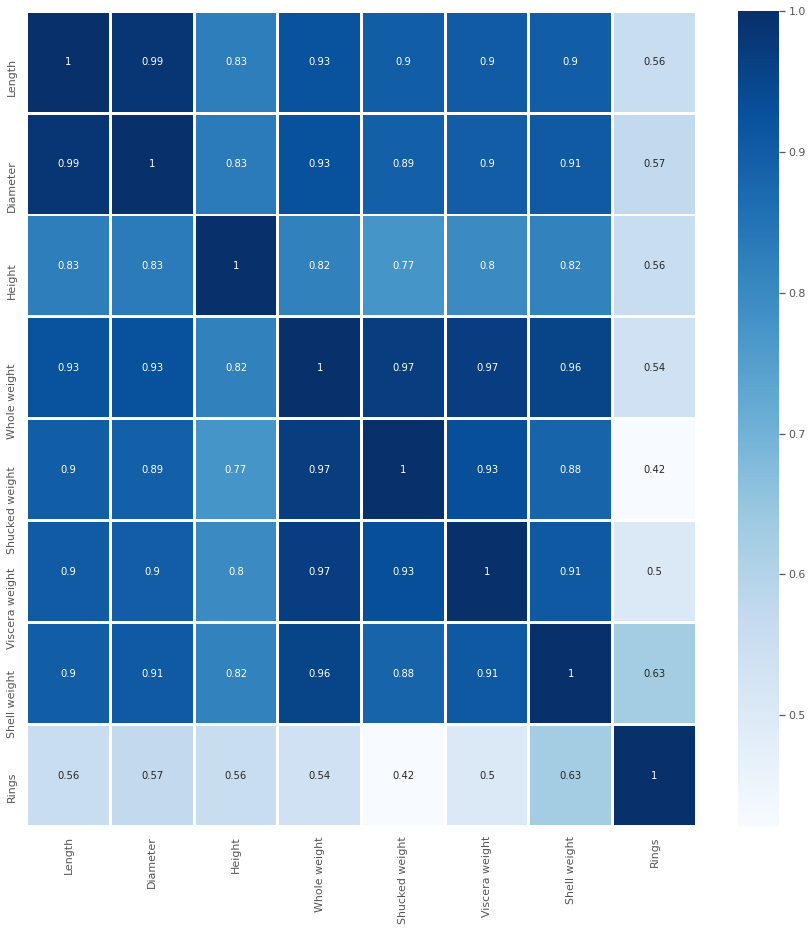

In [48]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(15, 15))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="Blues", linewidths=2, linecolor='white')


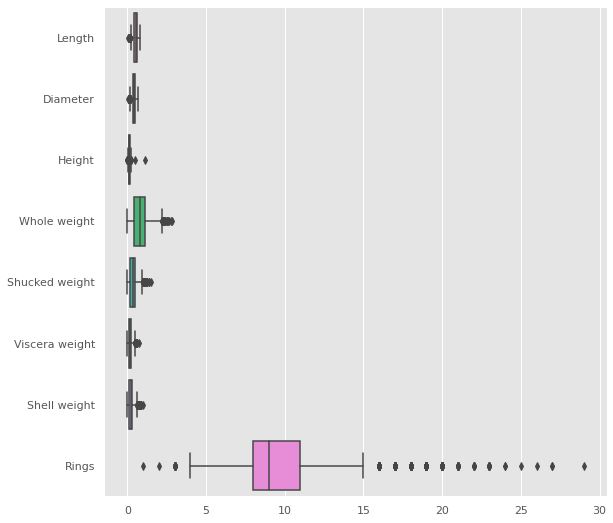

In [49]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(9, 9))
numeric_columns = df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
sns.boxplot(data=df[numeric_columns], orient='h')
plt.show()

In [50]:
df.columns[1:]

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Q1: 0.45 | Q2: 0.55 | Q3: 0.61



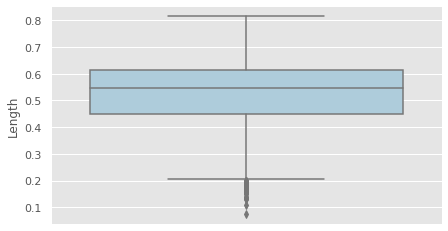

Q1: 0.35 | Q2: 0.42 | Q3: 0.48



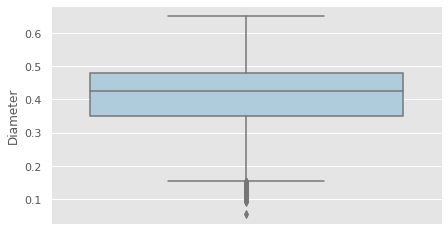

Q1: 0.12 | Q2: 0.14 | Q3: 0.17



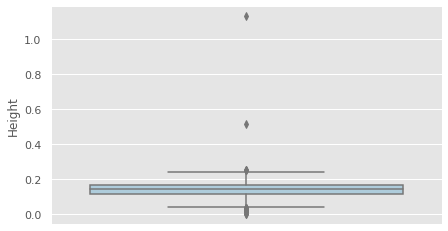

Q1: 0.44 | Q2: 0.80 | Q3: 1.15



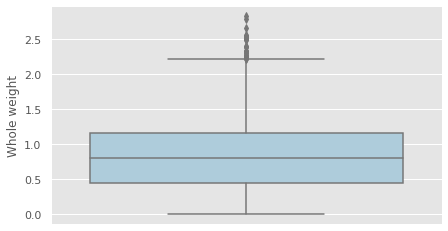

Q1: 0.19 | Q2: 0.34 | Q3: 0.50



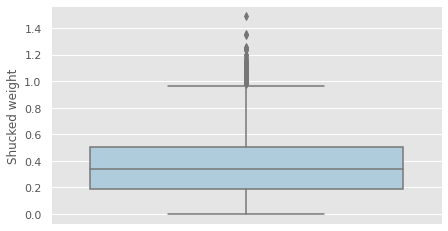

Q1: 0.09 | Q2: 0.17 | Q3: 0.25



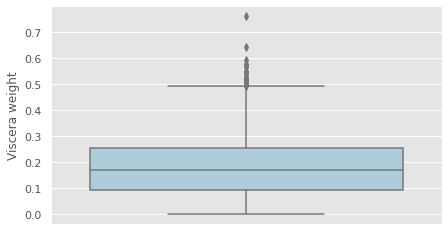

Q1: 0.13 | Q2: 0.23 | Q3: 0.33



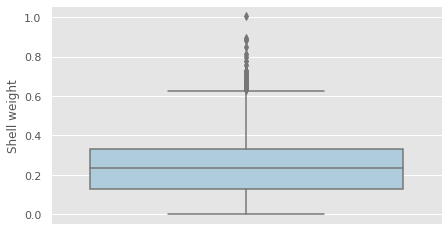

Q1: 8.00 | Q2: 9.00 | Q3: 11.00



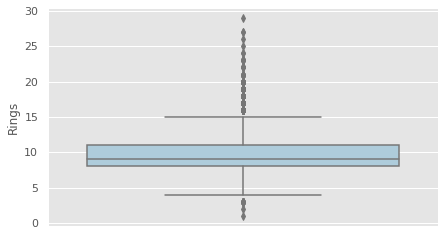

In [51]:
for i in df.columns:
    if i == 'Sex':
        continue
    plt.figure(figsize=(7, 4))
    
    q1 = np.percentile(df[i], 25)
    q2 = np.percentile(df[i], 50)
    q3 = np.percentile(df[i], 75)
    
    print("Q1: {:.2f} | Q2: {:.2f} | Q3: {:.2f}\n".format(q1, q2, q3))
    
    sns.boxplot(x=df[i], palette="Paired", orient='v')
    plt.show()

In [52]:
def outlier_th(dataframe, col_name, q1, q3):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    up_limit  = q3 + 1.5 * iqr
    return low_limit, up_limit

for c in df.columns:
    if c in 'Sex':
        continue
    low, up = outlier_th(df, c, q1=0.25, q3=0.75)
    df = df[~((df[c] < low) | (df[c] > up))]

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.225,0.101,0.150,15
1,M,0.350,0.265,0.090,0.226,0.100,0.049,0.070,7
2,F,0.530,0.420,0.135,0.677,0.257,0.141,0.210,9
3,M,0.440,0.365,0.125,0.516,0.215,0.114,0.155,10
4,I,0.330,0.255,0.080,0.205,0.089,0.040,0.055,7


# Splitting the data

In [53]:
# Random state and loss
seed = 2023
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.15
val_size = 0.15


# Dependent Varibale Value map
# target_mapper = {"fraud": 1, "not_fraud": 0}
# Splitting the dataset into dependent and independent variable sets
# X,y = data.drop(columns=["label"]),  data["label"].map(target_mapper)

X, y = df.drop('Rings', axis=1), df['Rings']

# Splitting data into training, validation and test set

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed #, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed #, stratify=y_temp
)
print(
    "Training data shape:\n",
    X_train.shape,
    "\nValidation Data Shape:\n",
    X_val.shape,
    "\nTesting Data Shape:\n",
    X_test.shape,
)

Training data shape:
 (2725, 8) 
Validation Data Shape:
 (482, 8) 
Testing Data Shape:
 (566, 8)


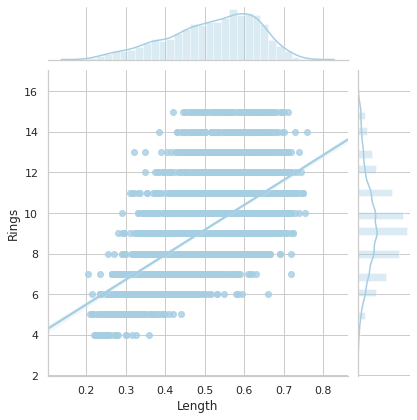

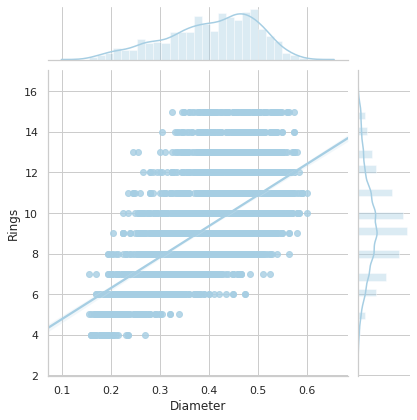

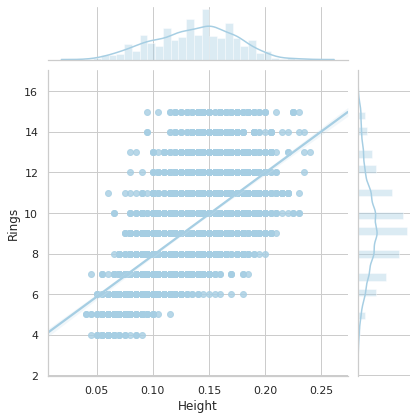

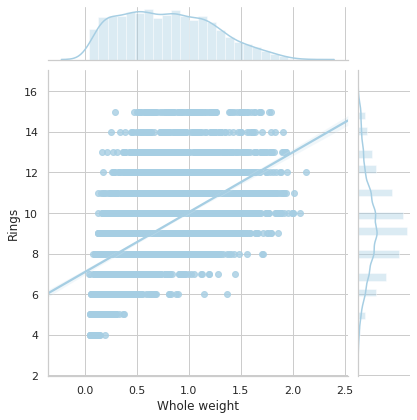

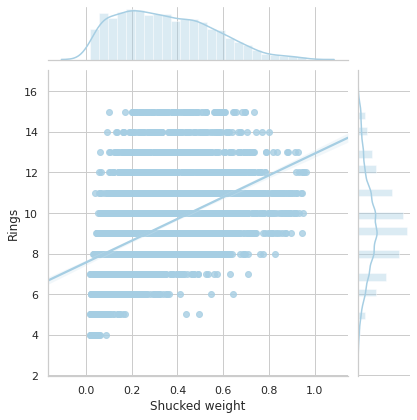

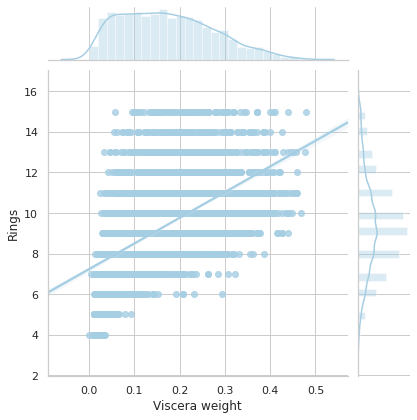

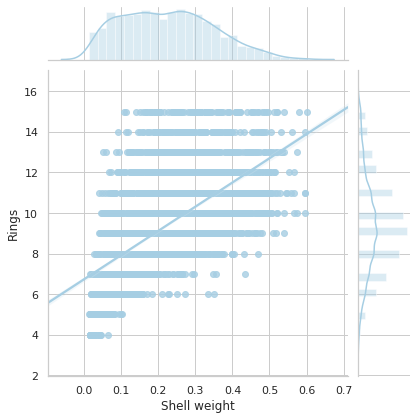

In [54]:
sns.set(style="whitegrid", palette="Paired")
features = [col for col in df.columns if col not in ['Sex', 'Rings']]
for feature in features:
    sns.jointplot(data=df, x=feature, y="Rings", kind="reg")
plt.show()

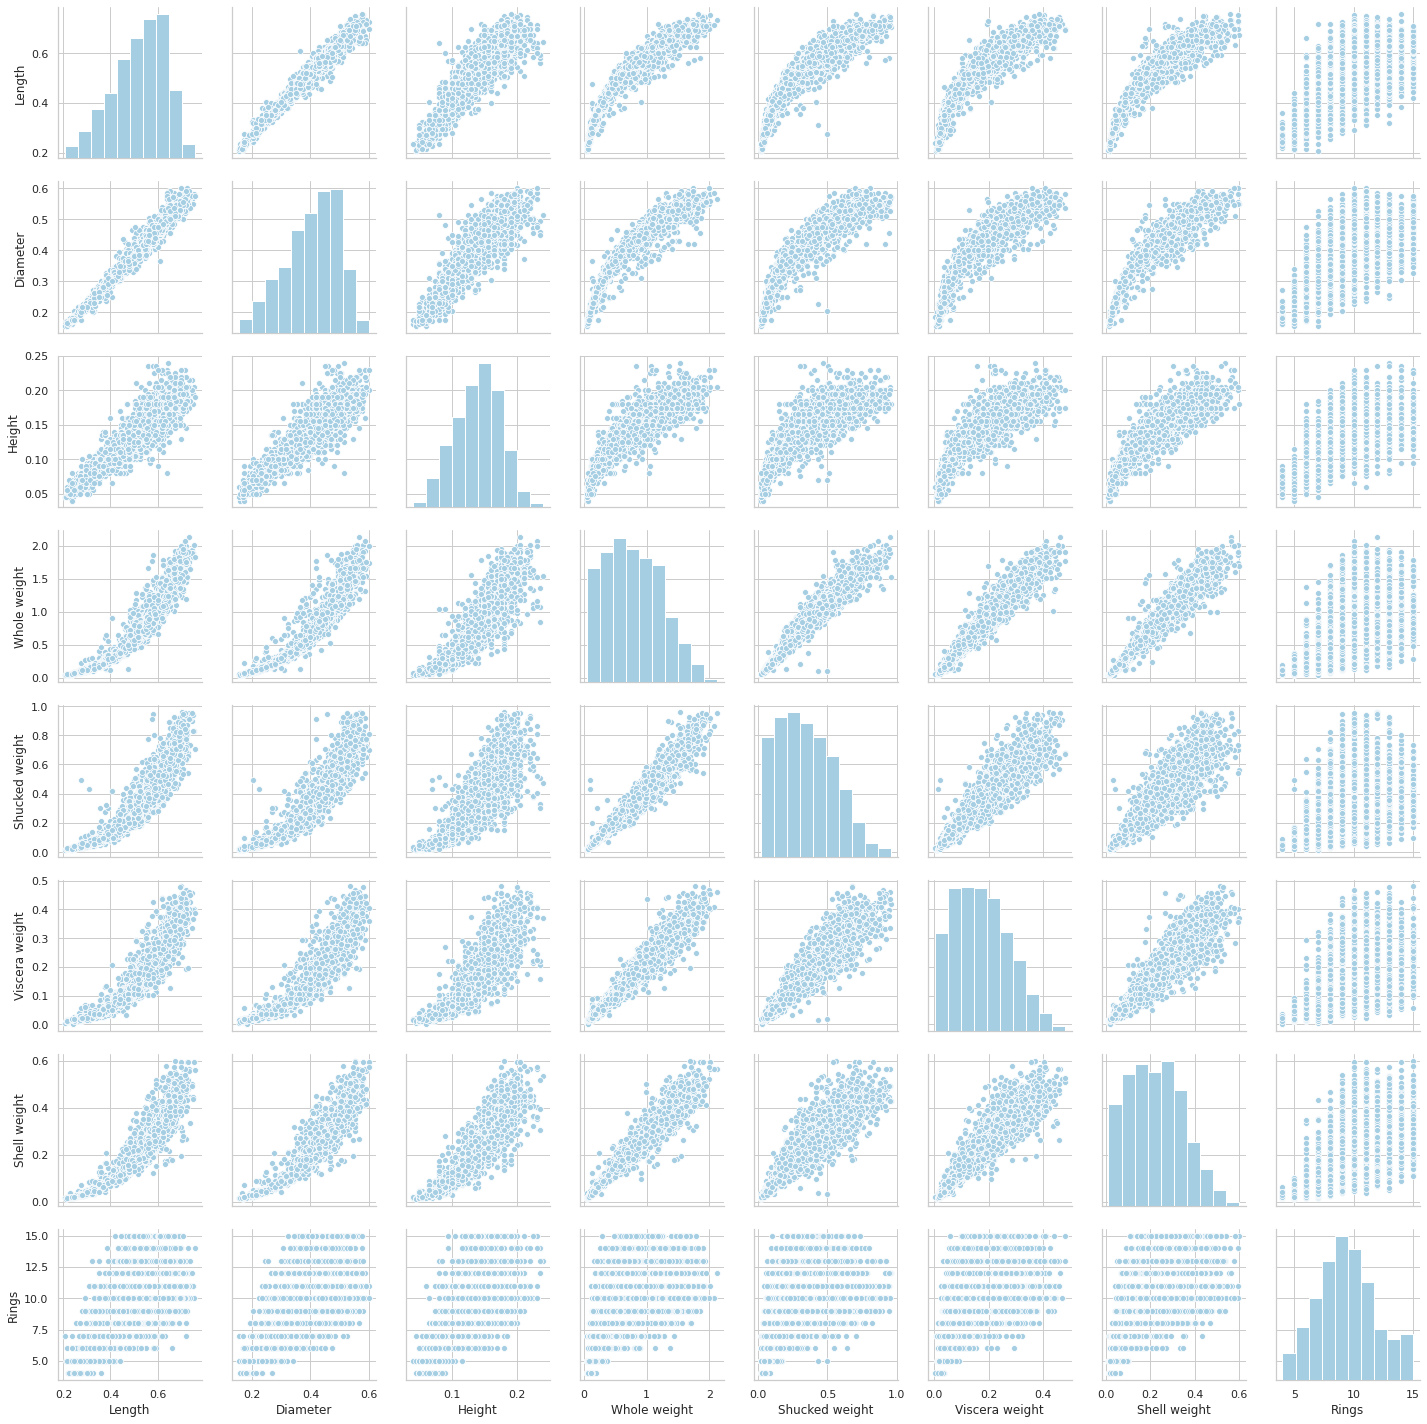

In [55]:
sns.pairplot(df)

## Data preprocessing

In [56]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

## Standardize feature names

In [57]:
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

In [58]:
# Select columns with dtype 'float'
num_columns_names = df.select_dtypes(include=['float64']).columns.to_list()

# Print the selected columns
print(num_columns_names)

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [59]:
X_train.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
dtype: object

### Impute categorical Nulls to Unknown

In [60]:
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

## Category Encoder

In [61]:
# Select columns with dtype 'float, int'
num_cols_name = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Print the selected columns
print(num_cols_name)

['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']


In [62]:
X_train.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight'],
      dtype='object')

In [63]:
import category_encoders as ce
# Create an instance of the TargetEncoder
encoder = ce.TargetEncoder(cols='sex')

# Fit and transform the data
X_train = encoder.fit_transform(X_train, y_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

## Correlation

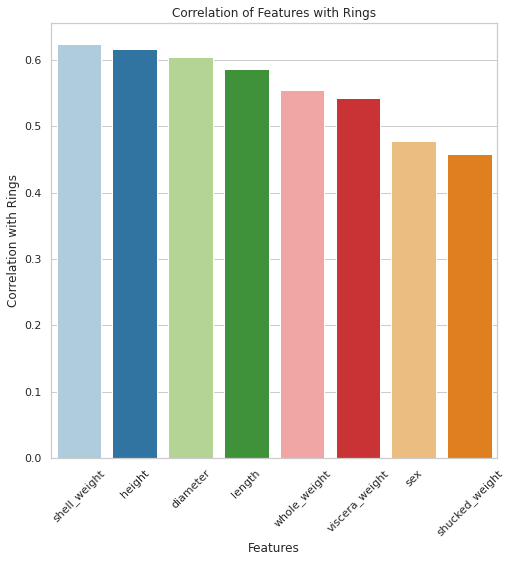

In [64]:
df_train = pd.concat([X_train, y_train], axis=1)
correlation_label = df_train.corr()['Rings']
correlation_label = correlation_label.drop('Rings').sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(x=correlation_label.index, y=correlation_label.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Rings')
plt.title('Correlation of Features with Rings')
plt.xticks(rotation=45)
plt.show()

In [65]:
print(
    "Training data shape:\n",
    X_train.shape,
    "\nValidation Data Shape:\n",
    X_val.shape,
    "\nTesting Data Shape:\n",
    X_test.shape,
)

Training data shape:
 (2725, 8) 
Validation Data Shape:
 (482, 8) 
Testing Data Shape:
 (566, 8)


In [66]:
X_train.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
577,10.396,0.585,0.435,0.175,0.982,0.406,0.249,0.270
2980,7.846,0.500,0.370,0.115,0.575,0.306,0.112,0.141
2804,10.396,0.660,0.505,0.190,1.405,0.625,0.338,0.374
2857,10.038,0.665,0.515,0.190,1.639,0.831,0.357,0.371
2148,10.038,0.415,0.310,0.090,0.325,0.131,0.073,0.115


# MODEL BUILDING

In [67]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Support vector Regression', SVR()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

scalers = [
    ('Standard Scaler', StandardScaler()),
    ('MinMax Scaler', MinMaxScaler()),
    ('RobustScaler', RobustScaler()),
    ('Quantile Transformer', QuantileTransformer()),
    ('Power Transformer', PowerTransformer())
]

results = []
for regressor_name, regressor in regressors:
    for scaler_name, scaler in scalers:
        pipe = Pipeline([
            ('scaler', scaler),
            ('regressor', regressor)
        ])
        pipe.fit(X_train, y_train)
        y_pred_val = pipe.predict(X_val)
        r2 = r2_score(y_val, y_pred_val)
        mse = mean_squared_error(y_val, y_pred_val)
        rmse = np.sqrt(mse)
        results.append({
            'Regressor': regressor_name,
            'Scaler': scaler_name,
            'R2': r2,
            'MSE': mse,
            'RMSE': rmse
        })
        print(f"******** {regressor_name} + {scaler_name} ********")

******** Linear Regression + Standard Scaler ********
******** Linear Regression + MinMax Scaler ********
******** Linear Regression + RobustScaler ********
******** Linear Regression + Quantile Transformer ********
******** Linear Regression + Power Transformer ********
******** Ridge Regression + Standard Scaler ********
******** Ridge Regression + MinMax Scaler ********
******** Ridge Regression + RobustScaler ********
******** Ridge Regression + Quantile Transformer ********
******** Ridge Regression + Power Transformer ********
******** Lasso Regression + Standard Scaler ********
******** Lasso Regression + MinMax Scaler ********
******** Lasso Regression + RobustScaler ********
******** Lasso Regression + Quantile Transformer ********
******** Lasso Regression + Power Transformer ********
******** Decision Tree Regression + Standard Scaler ********
******** Decision Tree Regression + MinMax Scaler ********
******** Decision Tree Regression + RobustScaler ********
******** Decisio

In [68]:
results = pd.DataFrame(results)
results.head()

,Regressor,Scaler,R2,MSE,RMSE
0,Linear Regression,Standard Scaler,0.503,2.843,1.686
1,Linear Regression,MinMax Scaler,0.503,2.843,1.686
2,Linear Regression,RobustScaler,0.503,2.843,1.686
3,Linear Regression,Quantile Transformer,0.494,2.896,1.702
4,Linear Regression,Power Transformer,0.502,2.849,1.688


In [69]:
# test = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'David'], 'grade': [90, 80, 70, 60], 'passed': [True, False, False, True]})
# filtered_df = test[~test['passed']]
# print(filtered_df)  # Output: DataFrame with students who did not pass the exam

==================== Linear Regression ====================
================================= R^2 =======================


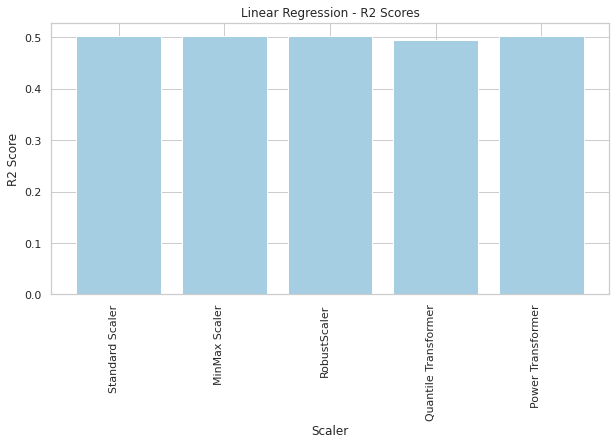

================================= MSE =======================


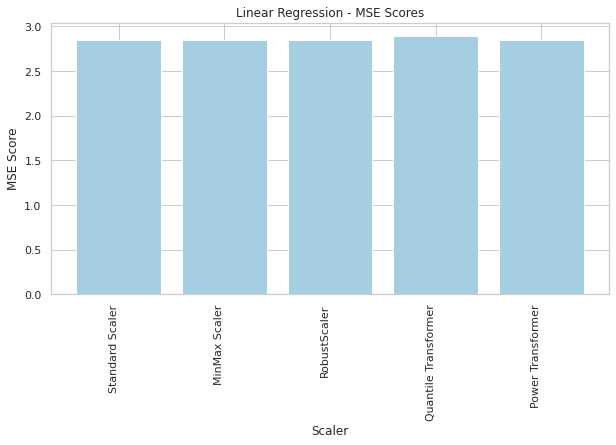

================================= RMSE =====================


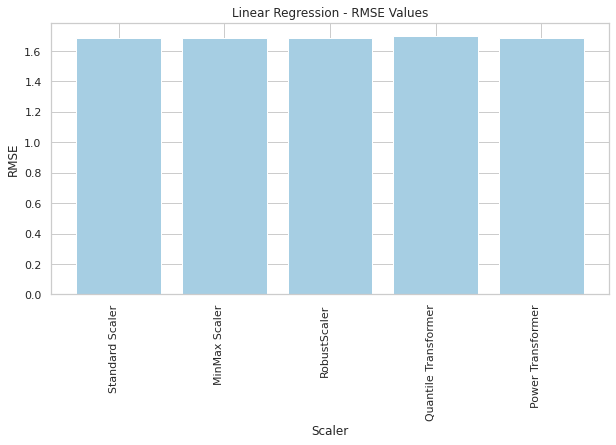

==================== Ridge Regression ====================
================================= R^2 =======================


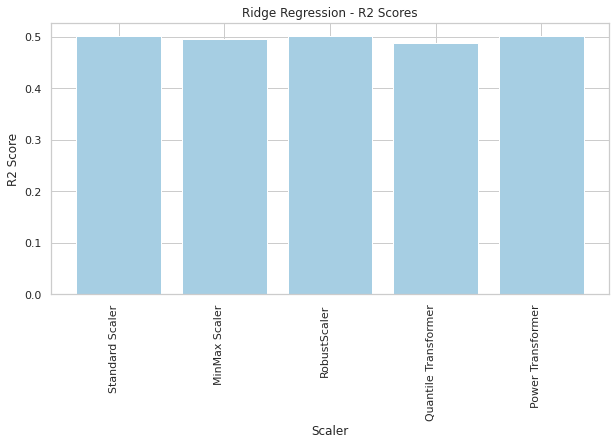

================================= MSE =======================


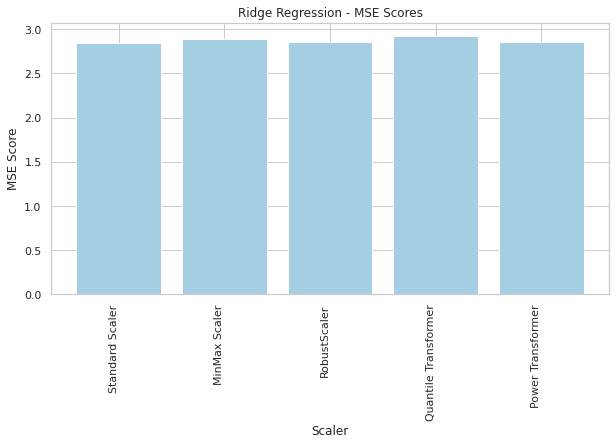

================================= RMSE =====================


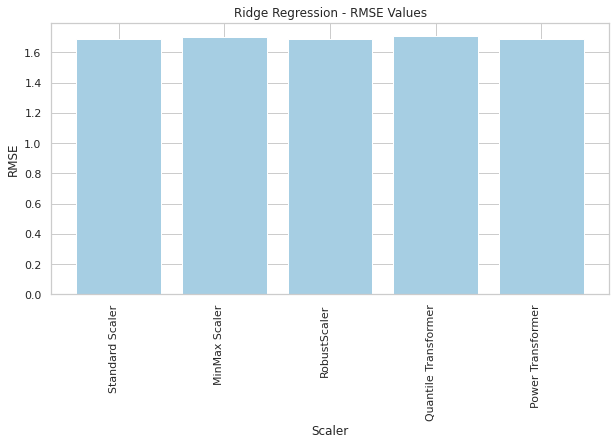

==================== Lasso Regression ====================
================================= R^2 =======================


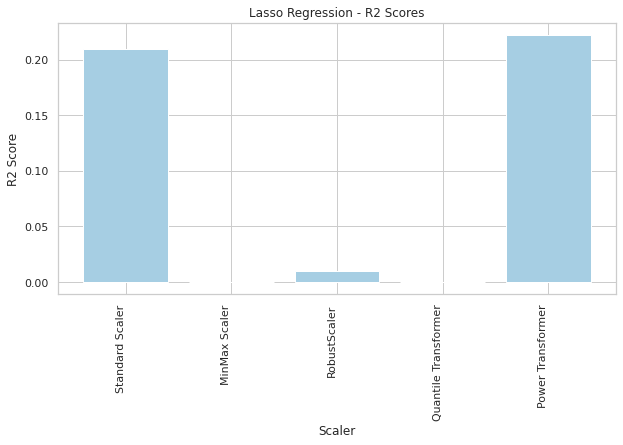

================================= MSE =======================


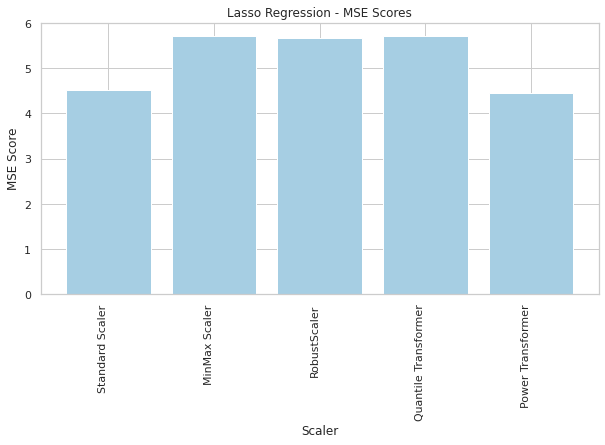

================================= RMSE =====================


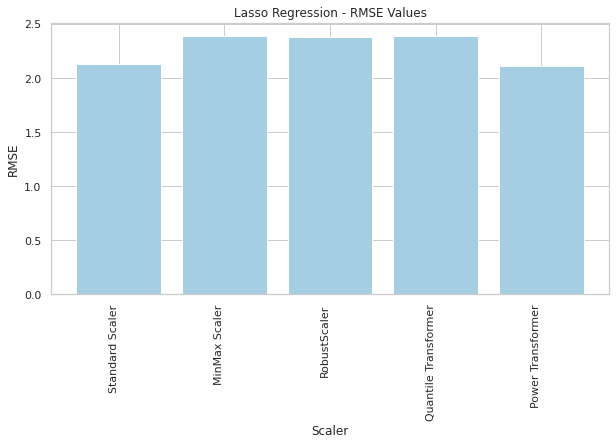

==================== Decision Tree Regression ====================
================================= R^2 =======================


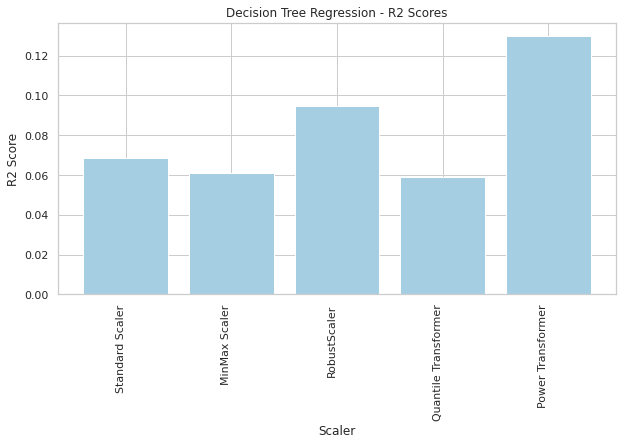

================================= MSE =======================


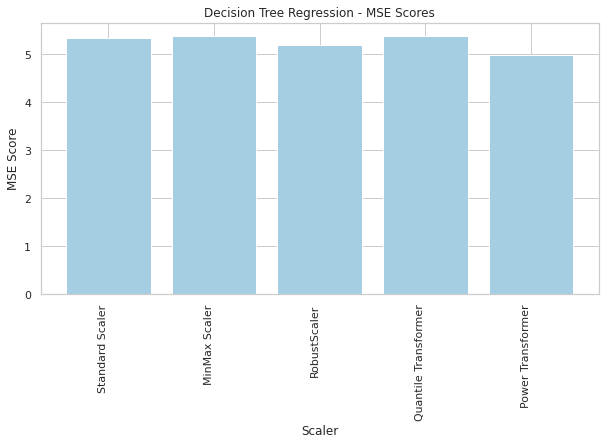

================================= RMSE =====================


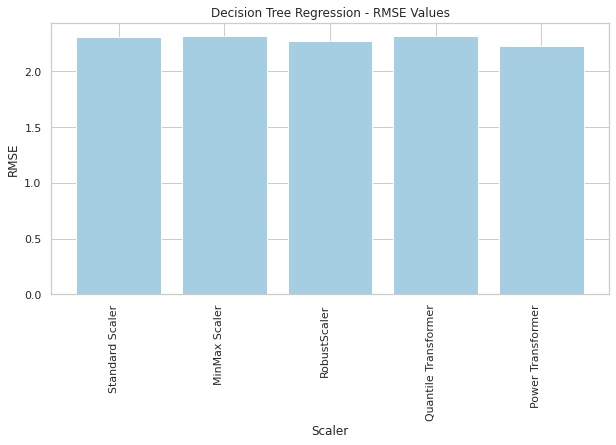

==================== Random Forest Regression ====================
================================= R^2 =======================


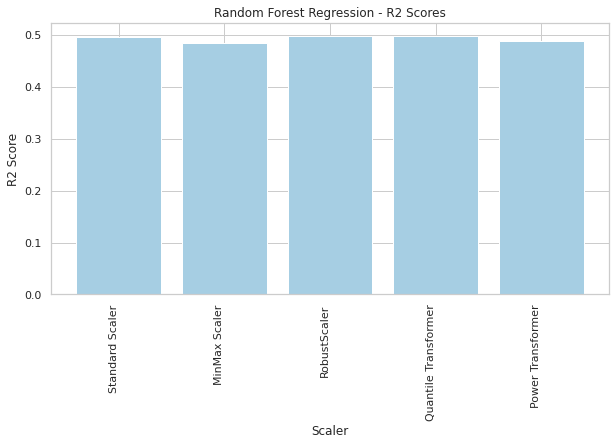

================================= MSE =======================


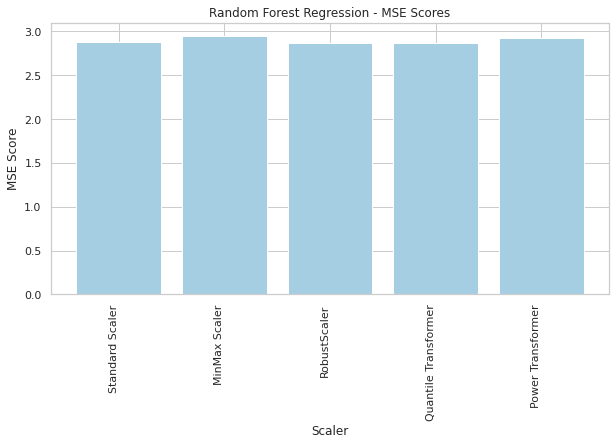

================================= RMSE =====================


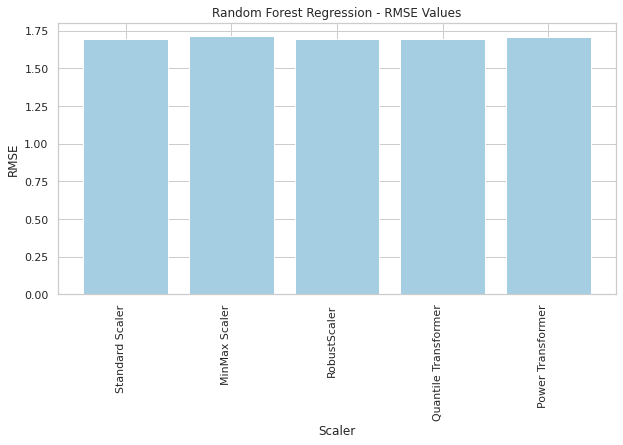

==================== Support vector Regression ====================
================================= R^2 =======================


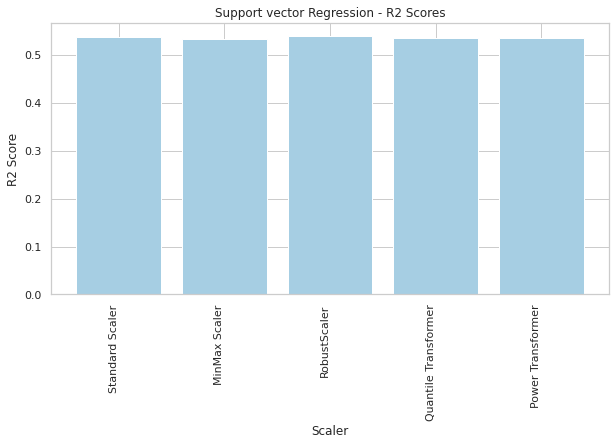

================================= MSE =======================


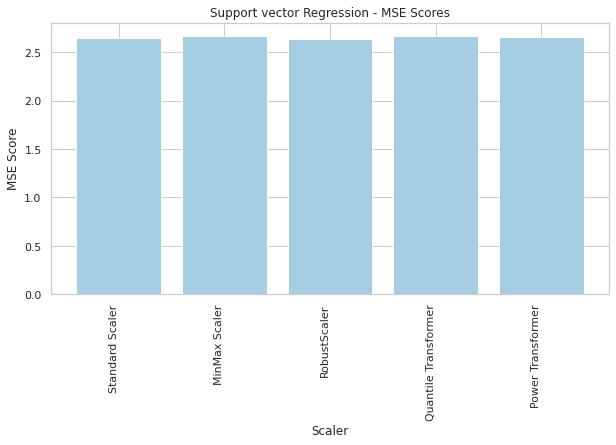

================================= RMSE =====================


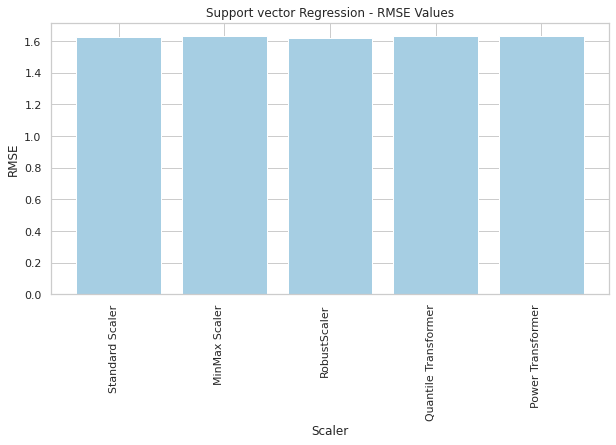

==================== Gradient Boosting Regressor ====================
================================= R^2 =======================


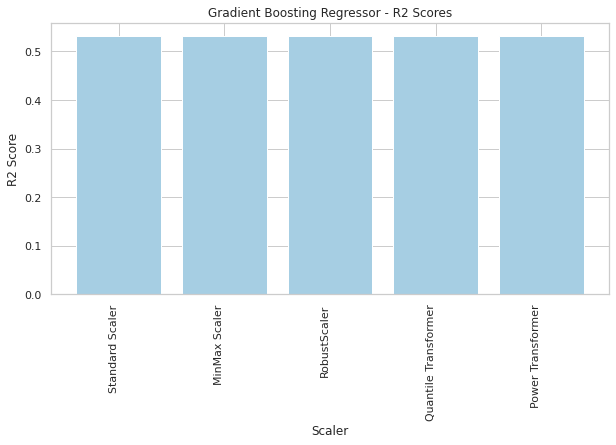

================================= MSE =======================


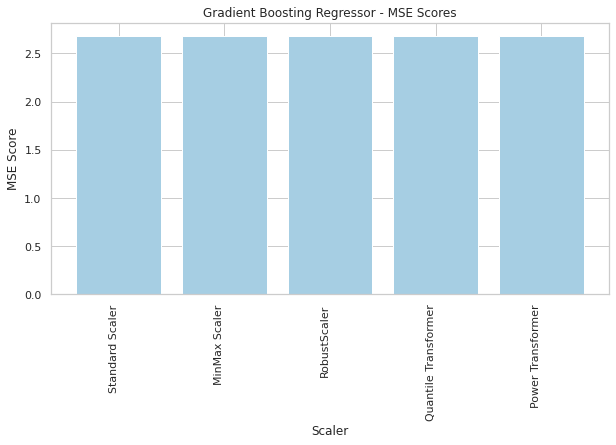

================================= RMSE =====================


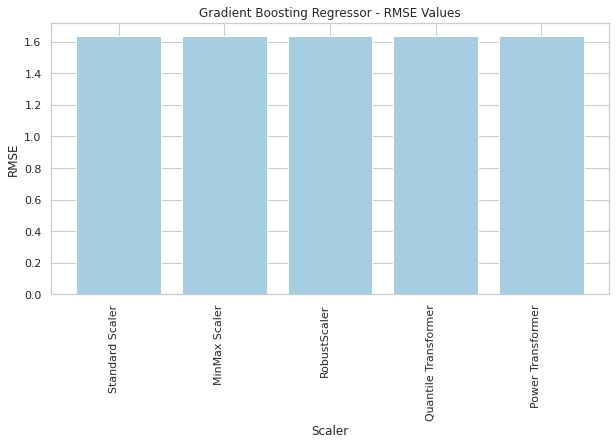

==================== KNeighborsRegressor ====================
================================= R^2 =======================


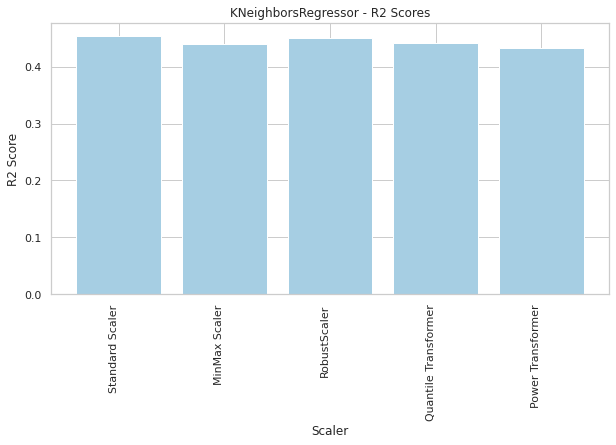

================================= MSE =======================


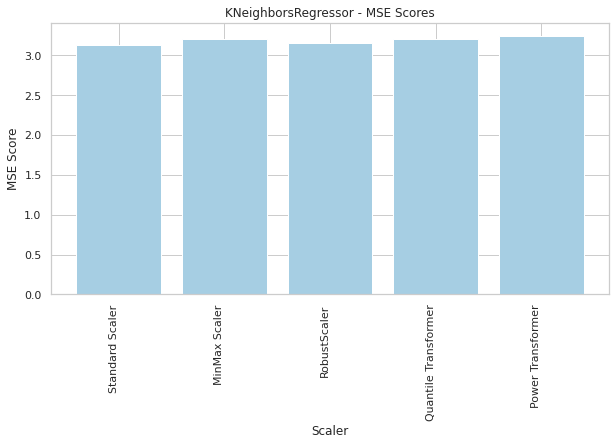

================================= RMSE =====================


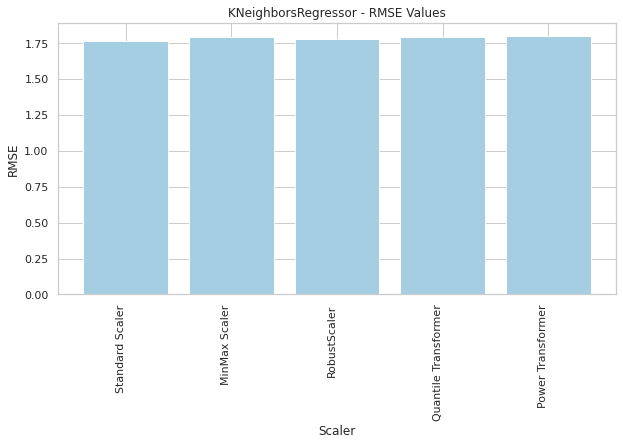

In [70]:
for regressor_name, regressor in regressors:
    df_regressor = results[results['Regressor'] == regressor_name]
    print(f"==================== {regressor_name} ====================")
    print("================================= R^2 =======================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['R2'])
    plt.title(f'{regressor_name} - R2 Scores')
    plt.xlabel('Scaler')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=90, ha='right')
    plt.show()
    
    print("================================= MSE =======================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['MSE'])
    plt.title(f'{regressor_name} - MSE Scores')
    plt.xlabel('Scaler')
    plt.ylabel('MSE Score')
    plt.xticks(rotation=90, ha='right')
    plt.show()
    
    print("================================= RMSE =====================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['RMSE'])
    plt.title(f'{regressor_name} - RMSE Values')
    plt.xlabel('Scaler')
    plt.ylabel('RMSE')
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [71]:
best_r2_row         = results.loc[results['R2'].idxmax()]
best_result_mse     = results.loc[results['R2'] == best_r2_row['R2']].loc[results['MSE'].idxmin()]
best_result_rmse    = results.loc[results['R2'] == best_result_mse['R2']].loc[results['RMSE'].idxmin()]
print("Best Result:")
print(best_result_rmse)

Best Result:
Regressor    Support vector Regression
Scaler                    RobustScaler
R2                               0.540
MSE                              2.630
RMSE                             1.622
Name: 27, dtype: object


# Hyperparameter Tunning Using GridSearchCV

In [80]:
# Define hyperparameter space
param_grid = {'svr__C': [0.01, 0.1, 1, 10],
              'svr__kernel': ['linear', 'rbf', 'poly'],
              'svr__gamma': ['scale', 'auto']}

svr = SVR()
# Create pipeline and GridSearchCV object
pipe = Pipeline([('scaler', RobustScaler()), ('svr', svr)])
gscv = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_squared_error')
# Fit the pipeline to training data
gscv.fit(X_train, y_train)

# Get best parameters and evaluate best model
best_params = gscv.best_params_
best_model = gscv.best_estimator_

print(f'Best params: {best_params}')

# Evaluate best model on test set
mse = mean_squared_error(y_val, best_model.predict(X_val))
print('Best MSE on val set:', mse)

Best params: {'svr__C': 10, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}
Best MSE on val set: 2.560141271995265


# Testing

In [ ]:
# pipeline = Pipeline([('scaler', RobustScaler()), ('regressor', SVR())])
# pipeline.fit(X_train, y_train)

In [78]:
y_pred = best_model.predict(X_test)
_mse = mean_squared_error(y_test, y_pred)
_r2 = r2_score(y_test, y_pred)

In [79]:
print(f'MSE: {_mse:.4f}')
print(f'R2 Score: {_r2:.4f}')

MSE: 2.3689
R2 Score: 0.5254
